In [120]:
#Observations:
# 1. From the plot of Max Temp vs. City Latitude, it appears that the data confirms our hypothesis of "As we 
#    approaches the equator, temperature rises". In fact, the plot looks similar to a bell curve in that, overall,
#    the maximum temperature(s) are established near the middle of the plot (0 degrees latitude) and decrease as 
#    latitudes move further from the middle.
# 2. One set of plots that support the conclusion above are the linear regressions of Max Temp vs. City Latitude 
#    for the northern and southern hemispheres. In fact, these are the strongest correlation(s) present from the linear 
#    regression comparison plots. However, because both r2 values are less than .7, even these correlations are not  
#    direct evidence to confirm the hypothesis above.
# 3. From the linear regressions of Cloudiness vs. City Latitude for both northern and southern hemispheres,
#    it appears that there is almost no correlation to be made for these parameters. The overall plot of Cloudiness
#    vs. City Latitude confirms this conclusion, as nearly any percentage of cloudiness can be found with equal 
#    probability across the latitudinal range.

In [97]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "File Output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [ ]:
# List for holding lat_lngs and cities
lat_longs = []
cities = []

# List for holding unique lat_lngs
unique_lat_longs = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
longs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_longs = zip(lats, longs)

# Identify nearest city for each lat, long combination
for lat_long in lat_longs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
    # If the city is unique, then add city and lat_lng to above lists
    if city not in cities:
        cities.append(city)
        unique_lat_longs.append(lat_long)
    else:
        print(f"{city} is not unique")

# Print the city count to confirm sufficient count
len(cities)

In [101]:
#Place lats & lngs from each unique lat_lng into separate lists

unique_lats = []
unique_longs = []

for i in range(len(unique_lat_longs)):
    unique_lats.append(unique_lat_longs[i][0])
    unique_longs.append(unique_lat_longs[i][1])

In [ ]:
#Initialize variables and lists
count = 0
max_temps = []
humidities = []
cloudiness = []
wind_speeds = []
dates = []
countries = []


#Open Output File (CSV)

with open(output_data_file,"w") as weather:
    
    weather.write("City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date\n")

    #Loop through cities and create custom target urls to get data from OpenWeather API if data exists
 
    for city in cities:
        count = count + 1
        try:
            base_url = "http://api.openweathermap.org/data/2.5/weather?"
            url = base_url + "appid=" + api_key + "&q=" + city
            response = requests.get(url).json()

            lat = response["coord"]["lat"]
            long = response["coord"]["lon"]
            max_temp = float(response["main"]["temp_max"])
            humidity = float(response["main"]["humidity"])
            clouds = float(response["clouds"]["all"])
            wind = float(response["wind"]["speed"])
            date = float(response["dt"])
            date = datetime.datetime.fromtimestamp(date).strftime('%m-%d-%Y')
            country = response["sys"]["country"]
            
            max_temp = 1.8*(max_temp-273.15)+32
            
            max_temps.append(max_temp)
            humidities.append(humidity)
            cloudiness.append(clouds)
            wind_speeds.append(wind)
            dates.append(date)
            countries.append(country)
            
            #Write data to Output File (CSV)
            weather.write(f"{city},{lat},{long},{max_temp},{humidity},{clouds},{wind},{country},{date}\n")

            print(f"Processing Record {count} of {len(cities)} | {city}")
        
        #If data does not exist for the city, write "NaN" to the Output File and dataframe
        except:
            max_temps.append(np.NaN)
            humidities.append(np.NaN)
            cloudiness.append(np.NaN)
            wind_speeds.append(np.NaN)
            dates.append(np.NaN)
            countries.append(np.NaN)

            weather.write(f"{city},{lat},{long},NaN,NaN,NaN,NaN,NaN,NaN\n")


            print(f"{city} not found. Skipping...")
        

In [103]:
#Create weather DataFrame

weather_dict = {}

weather_dict = {"City": cities, "Lat": unique_lats, "Long": unique_longs, "Max Temp": max_temps,
               "Humidity": humidities, "Cloudiness":cloudiness, "Wind Speed": wind_speeds, 
                "Country": countries, "Date":dates}

weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san rafael del sur,10.862494,-87.475782,80.600,78.0,75.0,4.10,NI,08-26-2020
1,hilo,18.914047,-149.252973,82.400,69.0,75.0,2.60,US,08-26-2020
2,bredasdorp,-88.517488,28.177086,51.422,82.0,1.0,4.84,ZA,08-26-2020
3,puerto del rosario,25.004727,-11.550319,78.800,83.0,85.0,1.00,ES,08-26-2020
4,yumen,34.129598,96.391943,59.108,33.0,43.0,6.20,CN,08-26-2020


In [104]:
#Clean weather DataFrame

weather_dropna_df = weather_df.dropna(how="any")
weather_dropna_df.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san rafael del sur,10.862494,-87.475782,80.600,78.0,75.0,4.10,NI,08-26-2020
1,hilo,18.914047,-149.252973,82.400,69.0,75.0,2.60,US,08-26-2020
2,bredasdorp,-88.517488,28.177086,51.422,82.0,1.0,4.84,ZA,08-26-2020
3,puerto del rosario,25.004727,-11.550319,78.800,83.0,85.0,1.00,ES,08-26-2020
4,yumen,34.129598,96.391943,59.108,33.0,43.0,6.20,CN,08-26-2020


In [71]:
#Question: Do we need to make summary statistics dataframe?

In [105]:
#  Get the indices of cities that have humidity over 100%

hum_over_100 = weather_dropna_df.loc[weather_dropna_df["Humidity"]>100].index
hum_over_100

Int64Index([], dtype='int64')

In [106]:
#Drop rows with humidity over 100%

cleaned_weather_df = weather_dropna_df.drop(axis=0,index=hum_over_100,inplace=False)
cleaned_weather_df.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san rafael del sur,10.862494,-87.475782,80.600,78.0,75.0,4.10,NI,08-26-2020
1,hilo,18.914047,-149.252973,82.400,69.0,75.0,2.60,US,08-26-2020
2,bredasdorp,-88.517488,28.177086,51.422,82.0,1.0,4.84,ZA,08-26-2020
3,puerto del rosario,25.004727,-11.550319,78.800,83.0,85.0,1.00,ES,08-26-2020
4,yumen,34.129598,96.391943,59.108,33.0,43.0,6.20,CN,08-26-2020


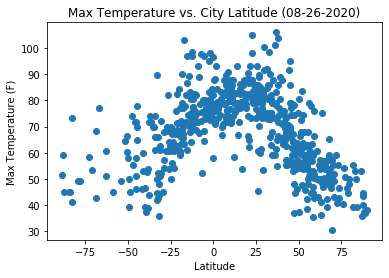

In [107]:
#Plot Max Temperature vs City Latitude (overall)

x_values = cleaned_weather_df["Lat"]
y_values = cleaned_weather_df["Max Temp"]
date = cleaned_weather_df.iloc[0,8]

temp_vs_lat = plt.scatter(x_values,y_values)
plt.title(f"Max Temperature vs. City Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.savefig("Images/temp_vs_lat.png")

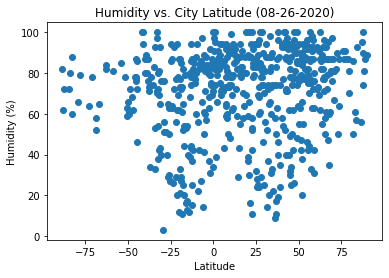

In [108]:
#Plot Humidity vs City Latitude (overall)

x_values = cleaned_weather_df["Lat"]
y_values = cleaned_weather_df["Humidity"]

hum_vs_lat = plt.scatter(x_values,y_values)
plt.title(f"Humidity vs. City Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("Images/hum_vs_lat.png")

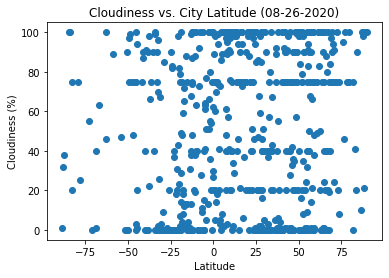

In [109]:
#Plot Cloudiness vs City Latitude (overall)

x_values = cleaned_weather_df["Lat"]
y_values = cleaned_weather_df["Cloudiness"]

cloud_vs_lat = plt.scatter(x_values,y_values)
plt.title(f"Cloudiness vs. City Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("Images/cloud_vs_lat.png")

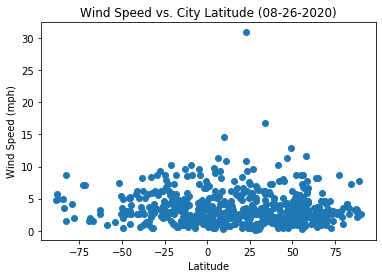

In [110]:
#Plot Wind Speed vs City Latitude (overall)

x_values = cleaned_weather_df["Lat"]
y_values = cleaned_weather_df["Wind Speed"]

wind_vs_lat = plt.scatter(x_values,y_values)
plt.title(f"Wind Speed vs. City Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("Images/wind_vs_lat.png")

In [111]:
#Filter and separate cleaned DataFrame into northern and southern hemispheres

northern_hemi_df = cleaned_weather_df.loc[cleaned_weather_df["Lat"]>0]
southern_hemi_df = cleaned_weather_df.loc[cleaned_weather_df["Lat"]<0]

r value: 0.5437948104206853
The plot shows a somewhat strong negative trend between rising latitude and max temperature;
i.e. as we travel further from the equator, max temperature falls.


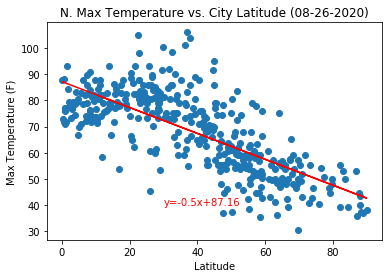

In [125]:
#Plot Max Temperature vs City Latitude (Northern Hemisphere)

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

temp_vs_lat = plt.scatter(x_values,y_values)
plt.title(f"N. Max Temperature vs. City Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

(slope, intercept, r, p, sem) = linregress(x_values, y_values)
fit = slope * x_values + intercept
line_eq = f"y={round(slope,2)}x+{round(intercept,2)}"
plt.plot(x_values,fit,"-r")
plt.annotate(line_eq, (30,40),color="red")
print(f"r value: {r**2}")

plt.savefig("Images/n_temp_vs_lat.png")

print("The plot shows a somewhat strong negative trend between rising latitude and max temperature;")
print("i.e. as we travel further from the equator, max temperature falls.")

r value: 0.3624974357313482
The plot shows a somewhat strong positive trend between rising latitude and max temperature;
i.e. as we travel closer to the equator, max temperature rises.


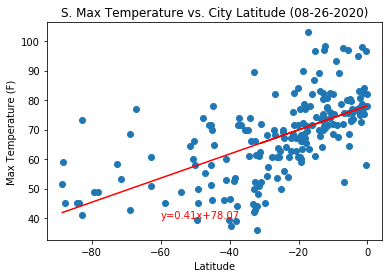

In [126]:
#Plot Max Temperature vs City Latitude (Southern Hemisphere)

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

temp_vs_lat = plt.scatter(x_values,y_values)
plt.title(f"S. Max Temperature vs. City Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

(slope, intercept, r, p, sem) = linregress(x_values, y_values)
fit = slope * x_values + intercept
line_eq = f"y={round(slope,2)}x+{round(intercept,2)}"
plt.plot(x_values,fit,"-r")
plt.annotate(line_eq, (-60,40),color="red")
print(f"r value: {r**2}")

plt.savefig("Images/s_temp_vs_lat.png")
print("The plot shows a somewhat strong positive trend between rising latitude and max temperature;")
print("i.e. as we travel closer to the equator, max temperature rises.")

r value: 0.001491163332665125
There appears to be no significant correlation between humidity and latitude.


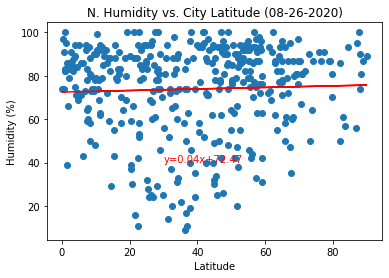

In [127]:
#Plot Humidity vs City Latitude (Northern Hemisphere)

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

hum_vs_lat = plt.scatter(x_values,y_values)
plt.title(f"N. Humidity vs. City Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

(slope, intercept, r, p, sem) = linregress(x_values, y_values)
fit = slope * x_values + intercept
line_eq = f"y={round(slope,2)}x+{round(intercept,2)}"
plt.plot(x_values,fit,"-r")
plt.annotate(line_eq, (30,40),color="red")
print(f"r value: {r**2}")

plt.savefig("Images/n_hum_vs_lat.png")
print("There appears to be no significant correlation between humidity and latitude.")

r value: 0.015042558235929097
There appears to be no significant correlation between humidity and latitude.


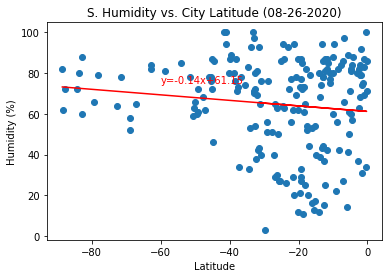

In [128]:
#Plot Humidity vs City Latitude (Southern Hemisphere)

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

hum_vs_lat = plt.scatter(x_values,y_values)
plt.title(f"S. Humidity vs. City Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

(slope, intercept, r, p, sem) = linregress(x_values, y_values)
fit = slope * x_values + intercept
line_eq = f"y={round(slope,2)}x+{round(intercept,2)}"
plt.plot(x_values,fit,"-r")
plt.annotate(line_eq, (-60,75),color="red")
print(f"r value: {r**2}")

plt.savefig("Images/s_hum_vs_lat.png")
print("There appears to be no significant correlation between humidity and latitude.")

r value: 0.00036109313550628755
There appears to be no significant correlation between cloudiness and latitude.


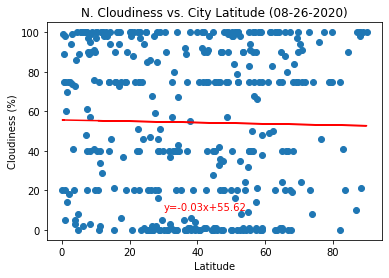

In [129]:
#Plot Cloudiness vs City Latitude (Northern Hemisphere)

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

cloud_vs_lat = plt.scatter(x_values,y_values)
plt.title(f"N. Cloudiness vs. City Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

(slope, intercept, r, p, sem) = linregress(x_values, y_values)
fit = slope * x_values + intercept
line_eq = f"y={round(slope,2)}x+{round(intercept,2)}"
plt.plot(x_values,fit,"-r")
plt.annotate(line_eq, (30,10),color="red")
print(f"r value: {r**2}")

plt.savefig("Images/n_cloud_vs_lat.png")
print("There appears to be no significant correlation between cloudiness and latitude.")

r value: 0.0004412877115761483
There appears to be no significant correlation between cloudiness and latitude.


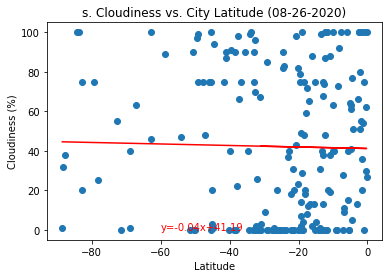

In [130]:
#Plot Cloudiness vs City Latitude (Southern Hemisphere)

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

cloud_vs_lat = plt.scatter(x_values,y_values)
plt.title(f"s. Cloudiness vs. City Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

(slope, intercept, r, p, sem) = linregress(x_values, y_values)
fit = slope * x_values + intercept
line_eq = f"y={round(slope,2)}x+{round(intercept,2)}"
plt.plot(x_values,fit,"-r")
plt.annotate(line_eq, (-60,0),color="red")
print(f"r value: {r**2}")

plt.savefig("Images/s_cloud_vs_lat.png")
print("There appears to be no significant correlation between cloudiness and latitude.")

r value: 0.0020823218236592695
There appears to be no significant correlation between wind speed and latitude.


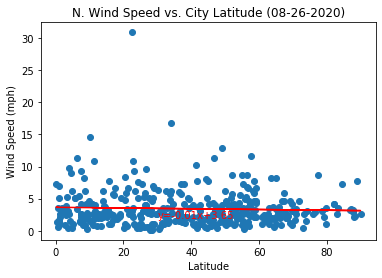

In [131]:
#Plot Wind Speed vs City Latitude (Northern Hemisphere)

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

wind_vs_lat = plt.scatter(x_values,y_values)
plt.title(f"N. Wind Speed vs. City Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

(slope, intercept, r, p, sem) = linregress(x_values, y_values)
fit = slope * x_values + intercept
line_eq = f"y={round(slope,2)}x+{round(intercept,2)}"
plt.plot(x_values,fit,"-r")
plt.annotate(line_eq, (30,2),color="red")
print(f"r value: {r**2}")

plt.savefig("Images/n_wind_vs_lat.png")
print("There appears to be no significant correlation between wind speed and latitude.")

r value: 0.003880436178297552
There appears to be no significant correlation between wind speed and latitude.


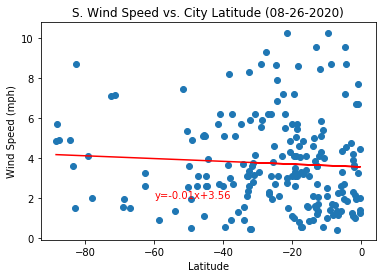

In [132]:
#Plot Wind Speed vs City Latitude (Southern Hemisphere)

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

wind_vs_lat = plt.scatter(x_values,y_values)
plt.title(f"S. Wind Speed vs. City Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

(slope, intercept, r, p, sem) = linregress(x_values, y_values)
fit = slope * x_values + intercept
line_eq = f"y={round(slope,2)}x+{round(intercept,2)}"
plt.plot(x_values,fit,"-r")
plt.annotate(line_eq, (-60,2),color="red")
print(f"r value: {r**2}")

plt.savefig("Images/s_wind_vs_lat.png")
print("There appears to be no significant correlation between wind speed and latitude.")